In [1]:
import pandas as pd
import numpy as np

import json

from scripts.utils import SimulateData
from stopsignalmetrics.ssrtmodel import SSRTmodel

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

## Suffix
### Indicates which set of results to view

In [2]:
suffix = 'SSRTscale-0'

# SSRT by SSD

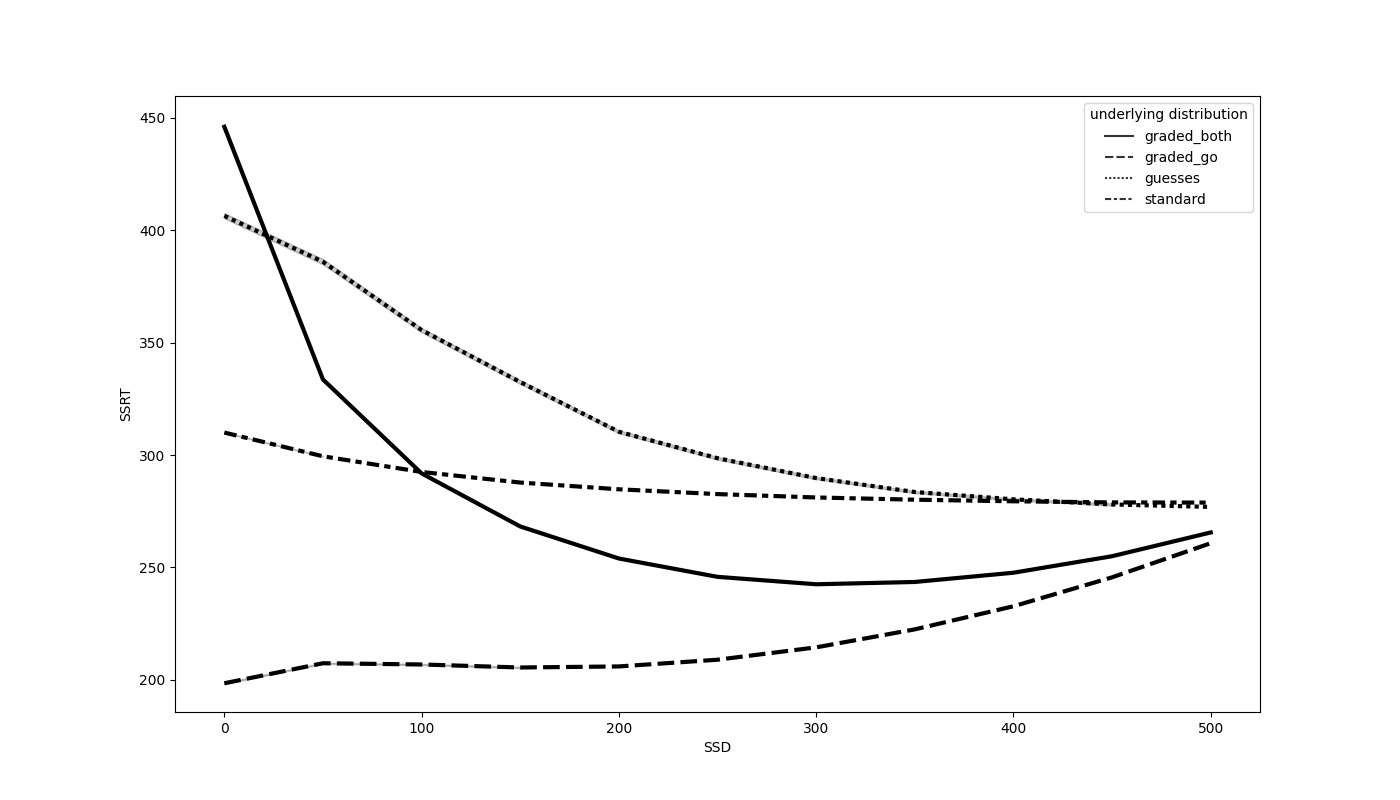

In [3]:
Image('figures/%s/SSRT_by_SSD.png' % suffix)

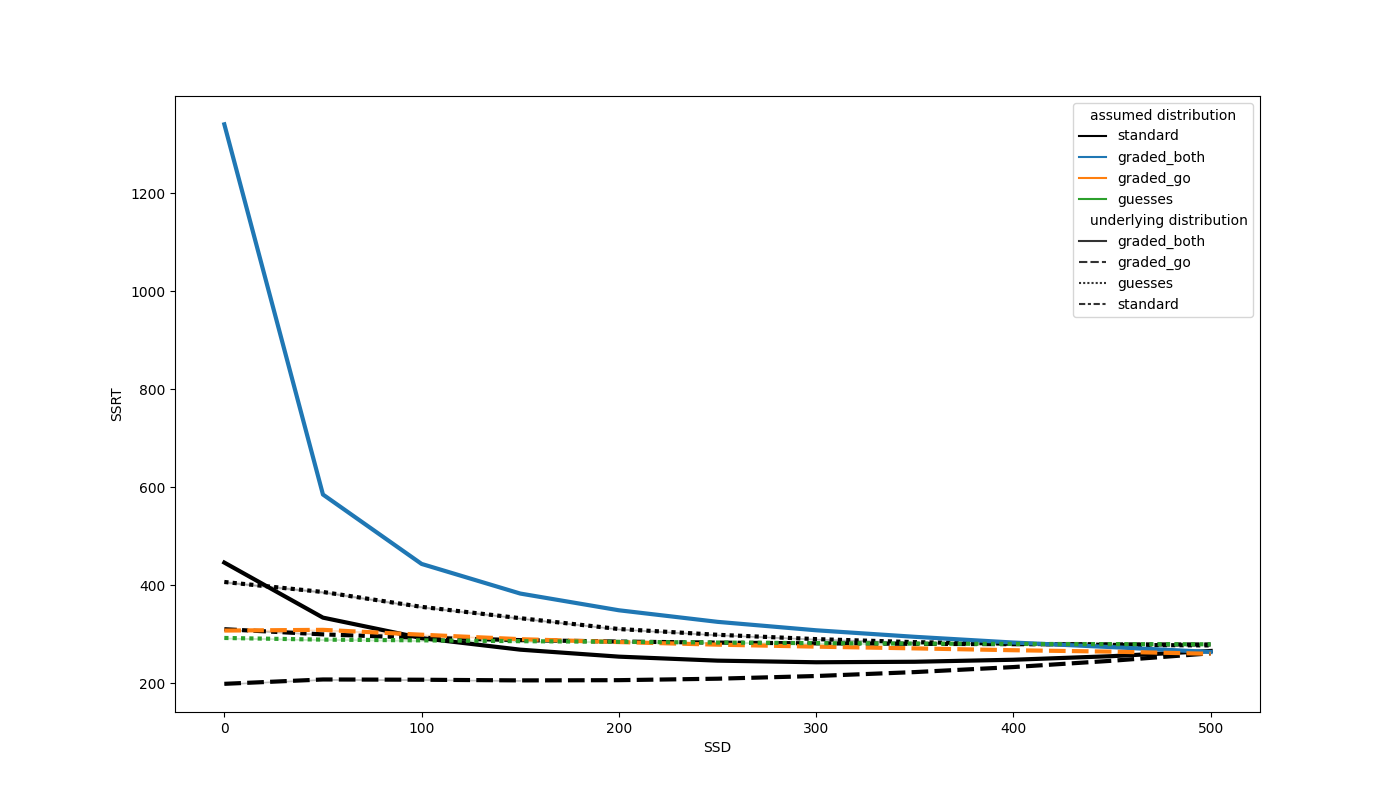

In [4]:
Image('figures/%s/SSRT_by_SSD_supplement.png' % suffix)

# Inhibition Function

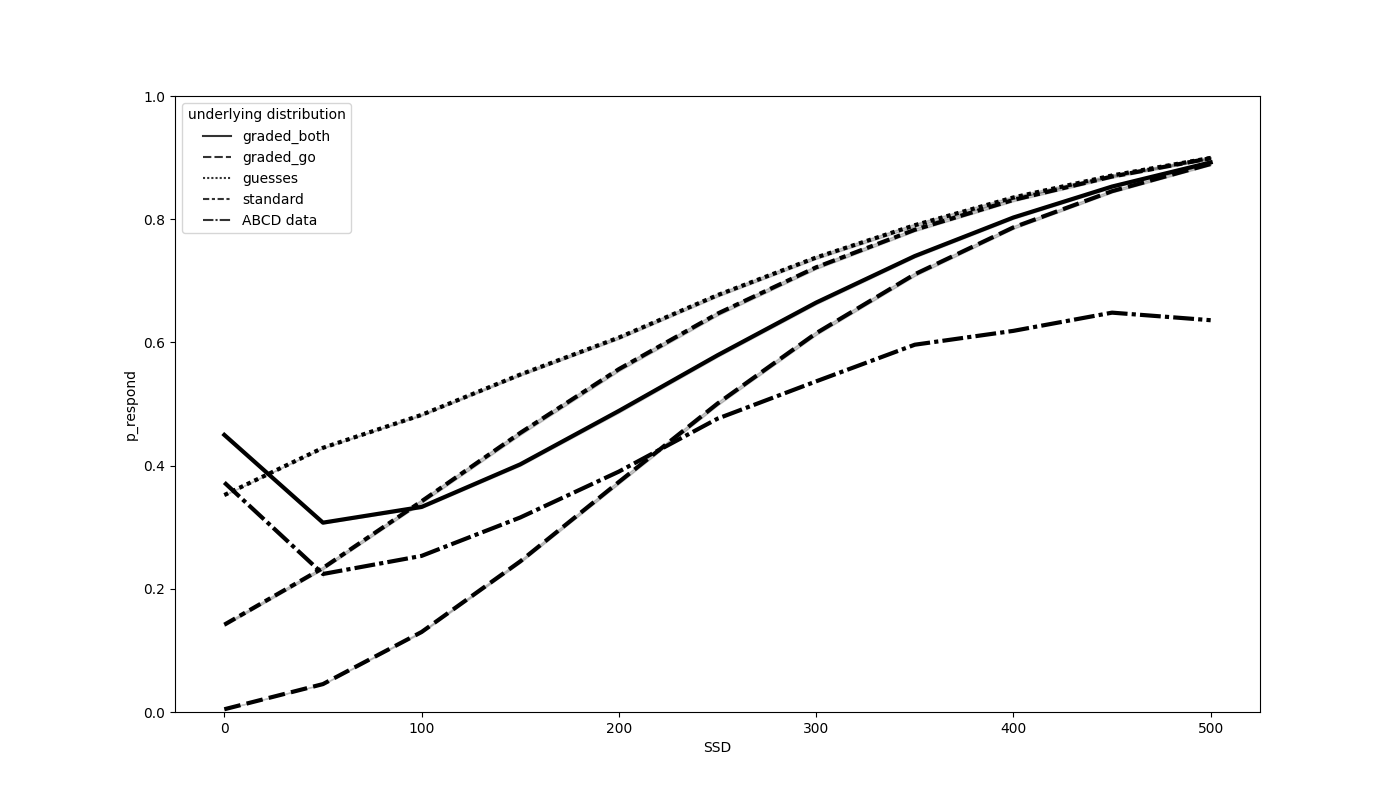

In [5]:
Image('figures/%s/inhibition_function.png' % suffix)

# Individual Differences

In [6]:
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [7]:
ssrt_df = pd.read_csv('ssrt_metrics/expected_ssrts_%s.csv' % suffix, index_col=0)

# reformatting - was multiindex
ssrt_df.columns = [ f'gen-{gen}_SSRT-{ssrt}' for gen, ssrt in zip(ssrt_df.loc['underlying distribution', :].values, ssrt_df.columns)]
ssrt_df = ssrt_df.drop(['underlying distribution', 'NARGUID'])

for col in ssrt_df.columns:
    ssrt_df[col] = ssrt_df[col].astype(float)


In [8]:
# sim_rt_info = pd.read_csv('simulated_data/sim_rt_meanStd.csv', index_col = 0)

In [9]:
# getting expect SSRTs
mus_path = 'abcd_data/assigned_mus_%s.json' % suffix
with open(mus_path, 'r') as f:
    mus_dict = json.load(f)
    
mus_df = pd.DataFrame(mus_dict).T

In [10]:
mus_df.head()

,goRT,go,SSRT,stop
003RTV85,561.562403,0.195480,301.339962,0.397867
007W6H7B,512.717273,0.216115,301.339962,0.397867
00CY2MDM,491.778190,0.226358,301.339962,0.397867
00HEV6HB,535.591873,0.205934,301.339962,0.397867
00J52GPG,437.594534,0.258002,301.339962,0.397867


In [11]:
monster_df = pd.concat([mus_df.add_prefix('assigned_'), ssrt_df], 1, sort=True)
monster_df.columns = [col.split('.')[0] for col in monster_df.columns]
monster_df = monster_df.loc[monster_df['gen-standard_SSRT-fixed'].notnull()]

In [12]:
monster_df.shape

(8238, 28)

In [13]:
def make_plot_square(ax):
    lowx, highx = ax.get_xlim()
    lowy, highy = ax.get_ylim()
    low = min(lowx, lowy)
    high = max(highx, highy)
    ax.set_xlim((low, high))
    ax.set_ylim((low, high))
    return ax

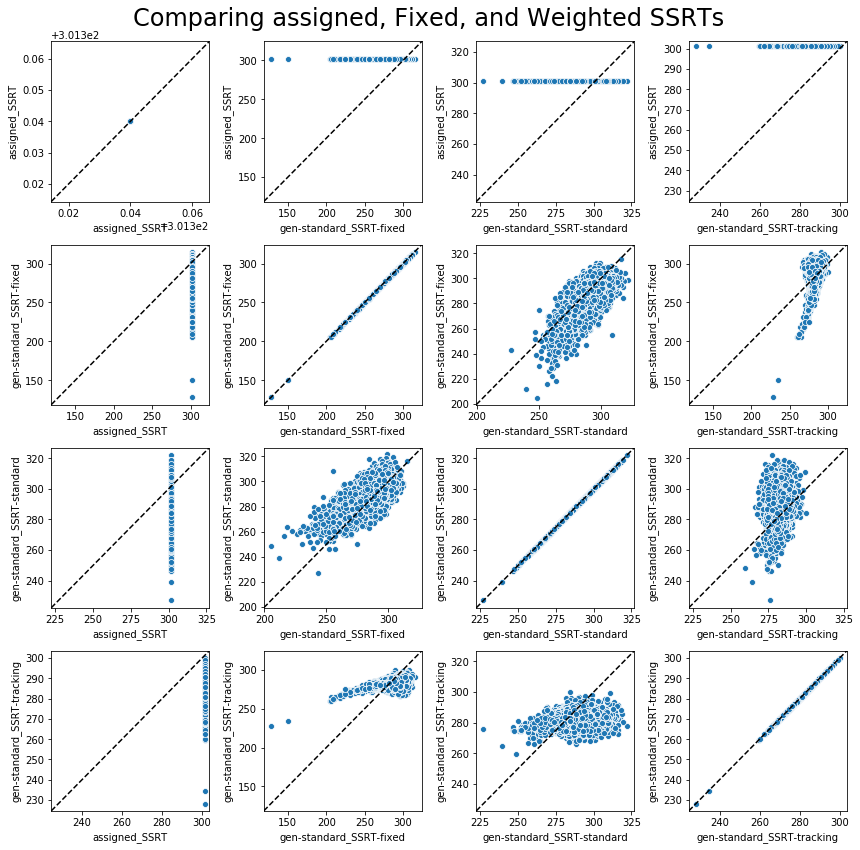

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))

columns = ['assigned_SSRT', 'gen-standard_SSRT-fixed', 'gen-standard_SSRT-standard', 'gen-standard_SSRT-tracking']
for idx,coli in enumerate(columns):
    for jdx, colj in enumerate(columns):
        ax = sns.scatterplot(x=colj, y=coli, data=monster_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing assigned, Fixed, and Weighted SSRTs', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [15]:
monster_df[columns].corr(method='spearman')

,assigned_SSRT,gen-standard_SSRT-fixed,gen-standard_SSRT-standard,gen-standard_SSRT-tracking
assigned_SSRT,NaN,NaN,NaN,NaN
gen-standard_SSRT-fixed,NaN,1.000000,0.612766,0.175606
gen-standard_SSRT-standard,NaN,0.612766,1.000000,0.120427
gen-standard_SSRT-tracking,NaN,0.175606,0.120427,1.000000


# Comparing Fixed SSRTs

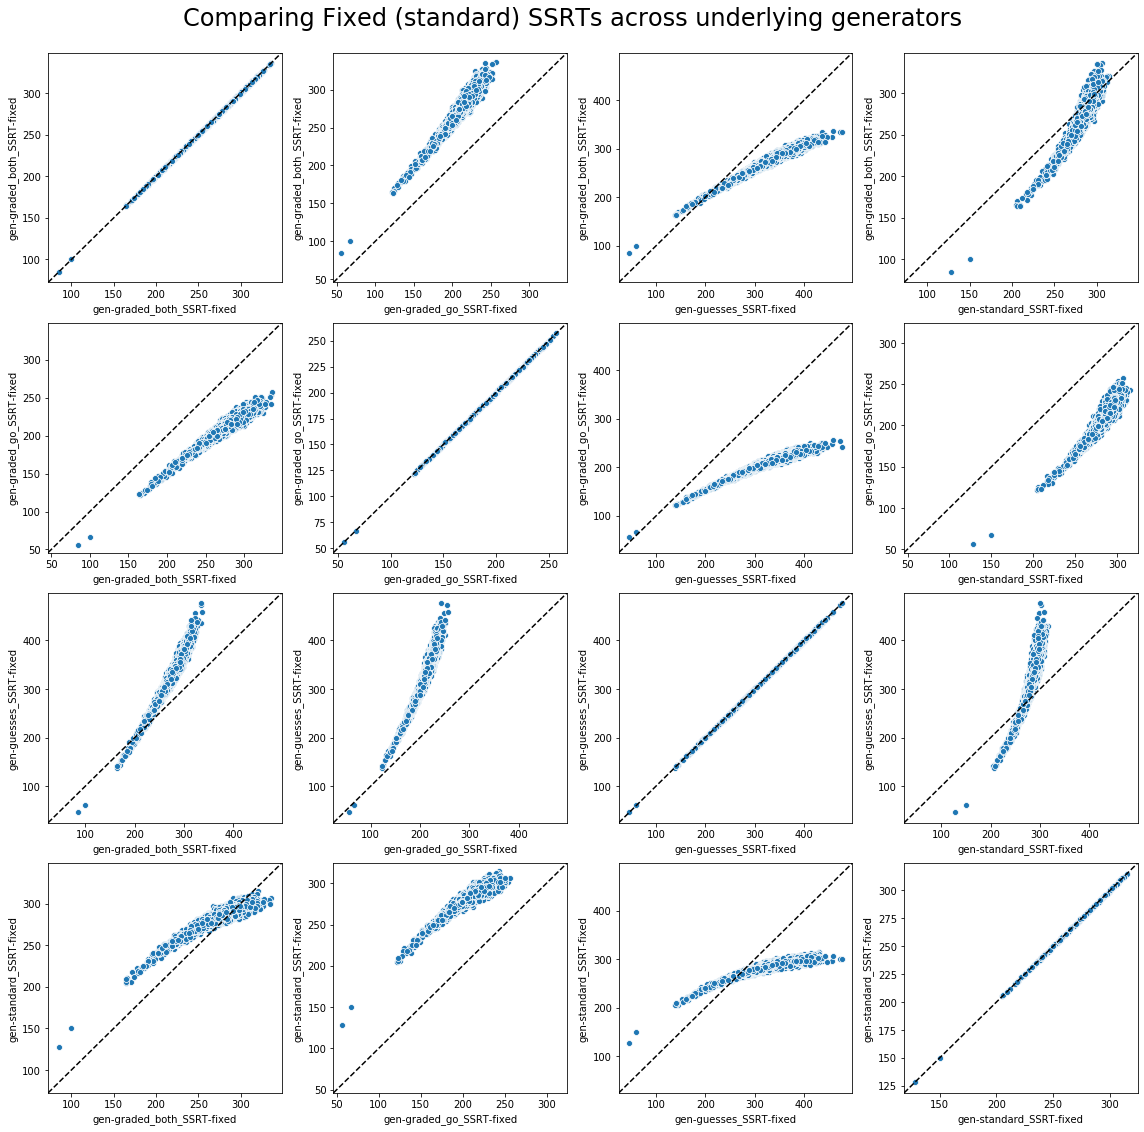

In [16]:
curr_df = monster_df.filter(regex='fixed')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Fixed (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [17]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed,gen-guesses_SSRT-fixed,gen-standard_SSRT-fixed
gen-graded_both_SSRT-fixed,1.000000,0.959347,0.978521,0.903127
gen-graded_go_SSRT-fixed,0.959347,1.000000,0.970373,0.895301
gen-guesses_SSRT-fixed,0.978521,0.970373,1.000000,0.913560
gen-standard_SSRT-fixed,0.903127,0.895301,0.913560,1.000000


## (not rescaling the axes to get a closer look)

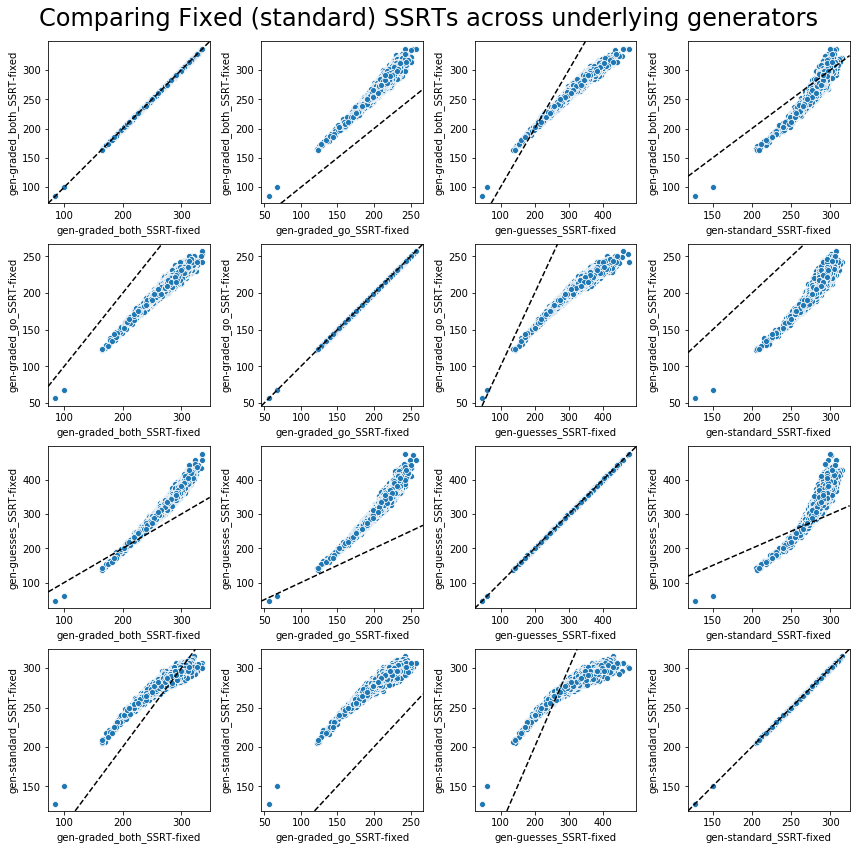

In [18]:
curr_df = monster_df.filter(regex='fixed')
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Fixed (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

# Weighted SSRTs (from randomly assigned SSD distributions)

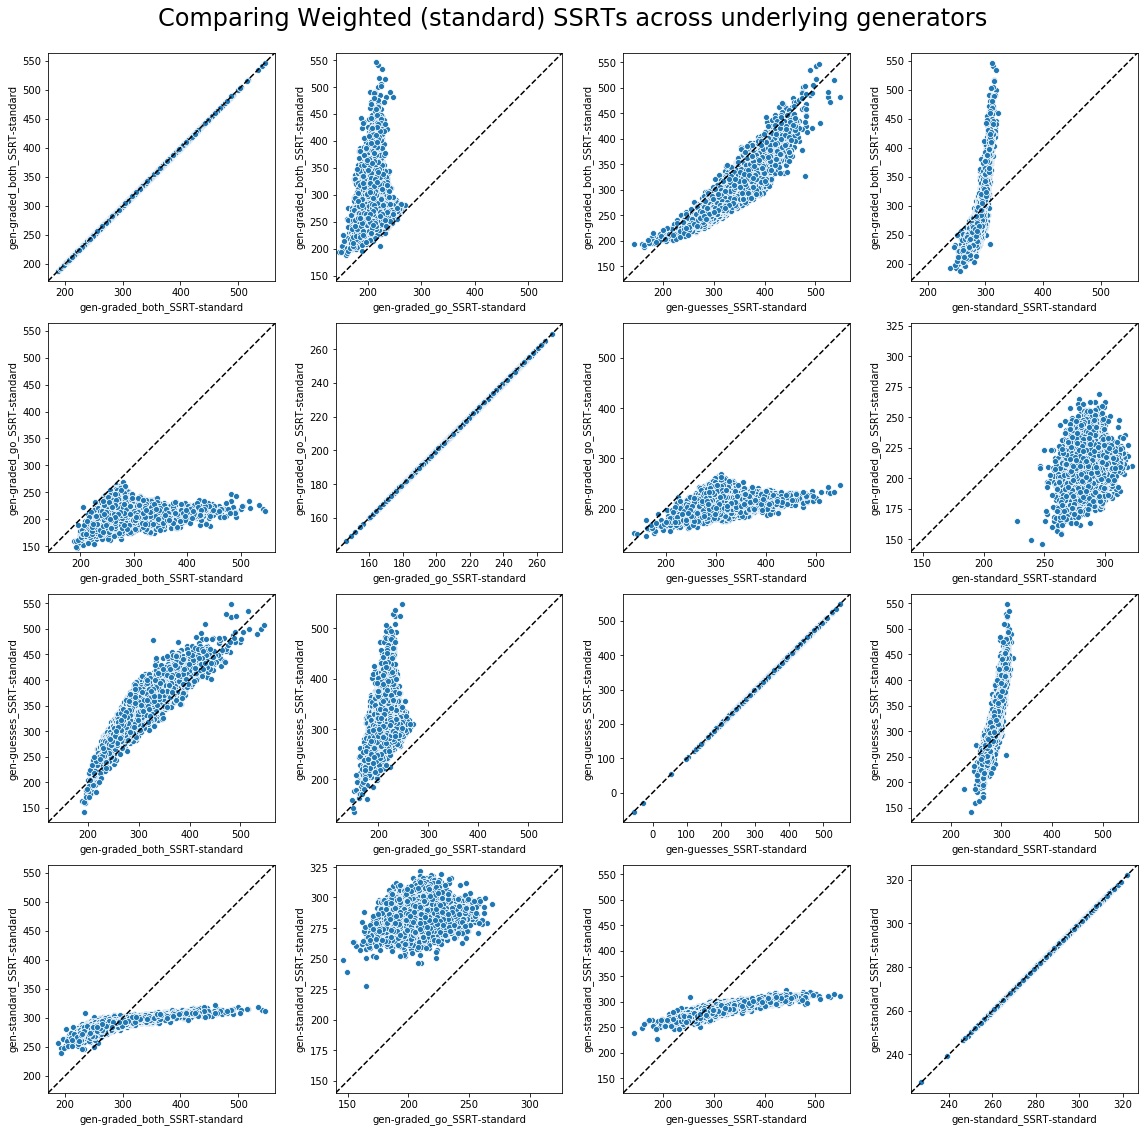

In [19]:
curr_df = monster_df.filter(regex='SSRT-standard')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Weighted (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [20]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard,gen-guesses_SSRT-standard,gen-standard_SSRT-standard
gen-graded_both_SSRT-standard,1.000000,0.082796,0.915809,0.845985
gen-graded_go_SSRT-standard,0.082796,1.000000,0.186981,0.093038
gen-guesses_SSRT-standard,0.915809,0.186981,1.000000,0.847431
gen-standard_SSRT-standard,0.845985,0.093038,0.847431,1.000000


## not rescaling axis to get a closer look

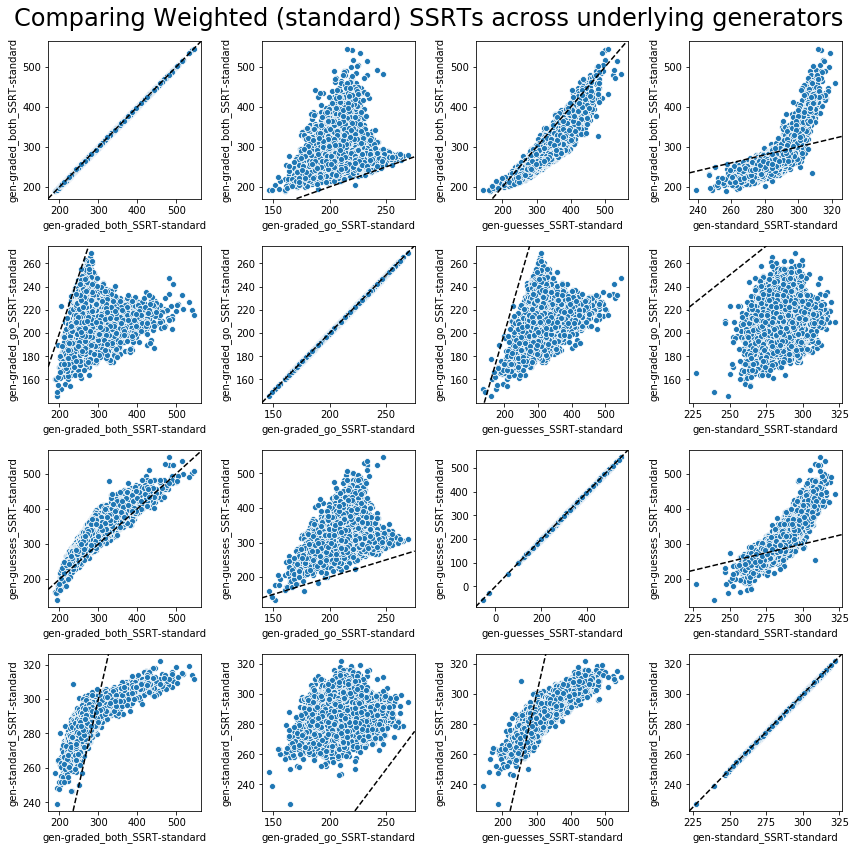

In [21]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Weighted (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

# Tracking-based SSRTs

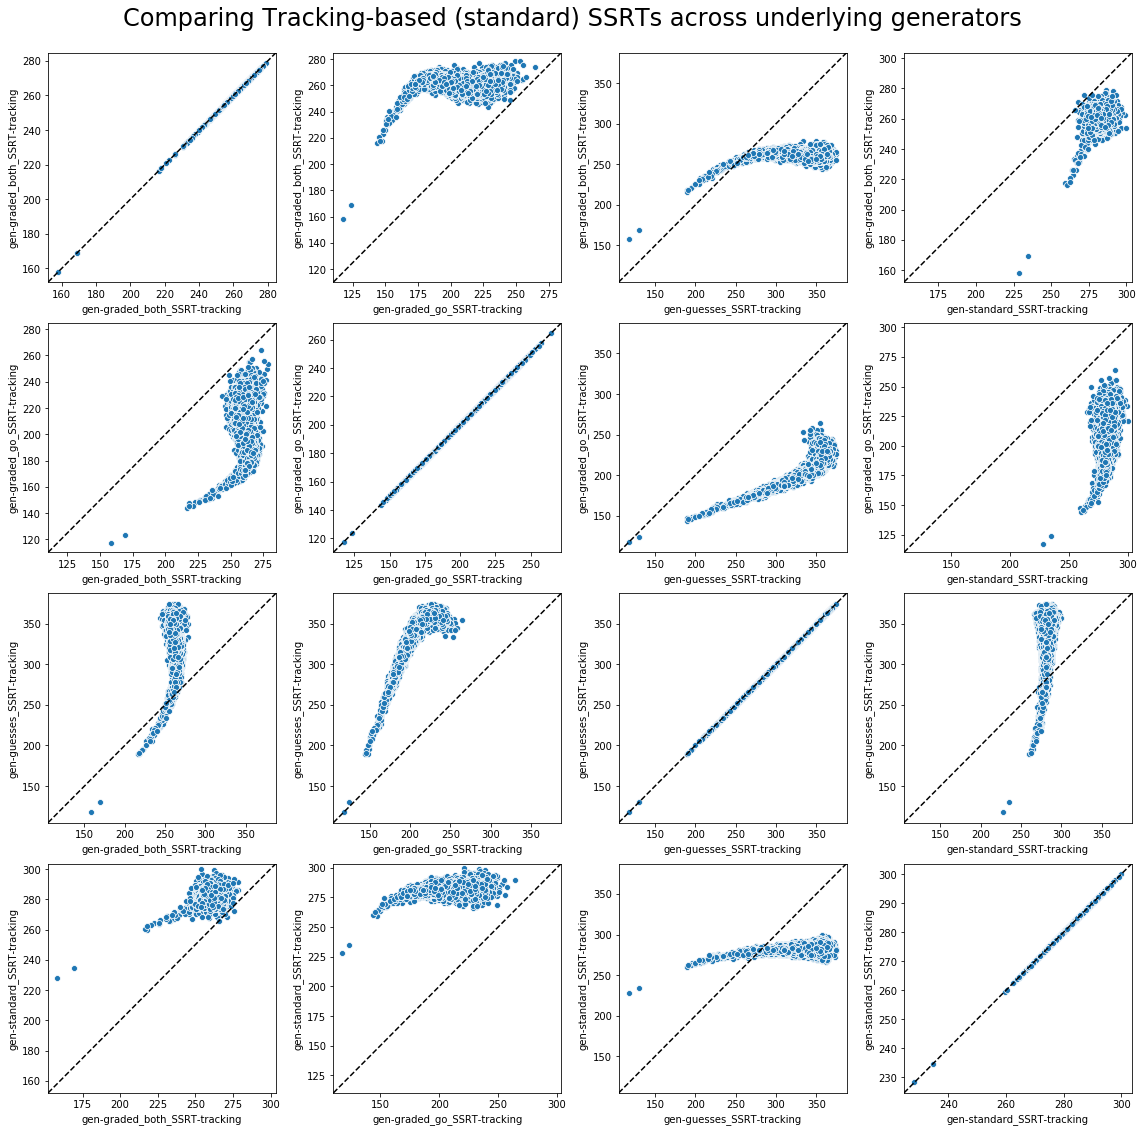

In [22]:
curr_df = monster_df.filter(regex='SSRT-tracking')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Tracking-based (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [23]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking,gen-guesses_SSRT-tracking,gen-standard_SSRT-tracking
gen-graded_both_SSRT-tracking,1.000000,-0.209108,-0.242536,0.021963
gen-graded_go_SSRT-tracking,-0.209108,1.000000,0.927836,0.182981
gen-guesses_SSRT-tracking,-0.242536,0.927836,1.000000,0.176225
gen-standard_SSRT-tracking,0.021963,0.182981,0.176225,1.000000


## not rescaling axes

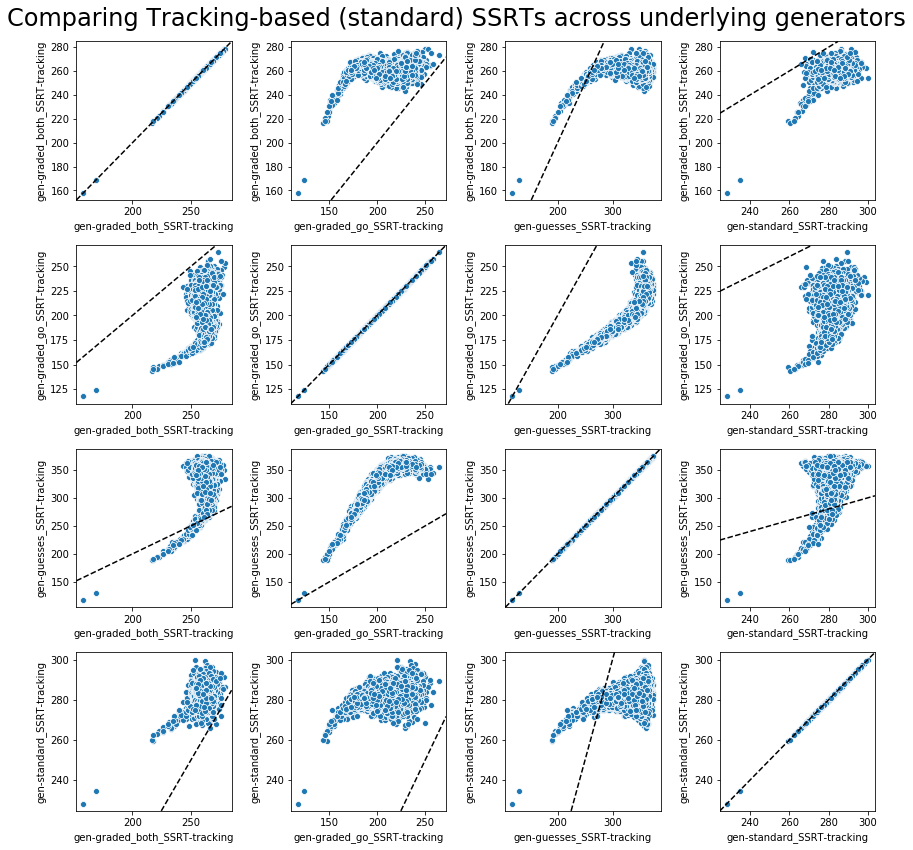

In [24]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Tracking-based (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [25]:
main_cols = ['assigned_SSRT',
             'gen-graded_both_SSRT-standard',
             'gen-graded_go_SSRT-standard',
             'gen-guesses_SSRT-standard',
             'gen-standard_SSRT-standard',
             'gen-graded_both_SSRT-fixed',
             'gen-graded_go_SSRT-fixed',
             'gen-guesses_SSRT-fixed',
             'gen-standard_SSRT-fixed',
             'gen-graded_both_SSRT-tracking',
             'gen-graded_go_SSRT-tracking',
             'gen-guesses_SSRT-tracking',
             'gen-standard_SSRT-tracking']
monster_df[main_cols].describe()

,assigned_SSRT,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard,gen-guesses_SSRT-standard,gen-standard_SSRT-standard,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed,gen-guesses_SSRT-fixed,gen-standard_SSRT-fixed,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking,gen-guesses_SSRT-tracking,gen-standard_SSRT-tracking
count,8.238000e+03,8214.000000,8218.000000,8236.000000,8203.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000
mean,3.013400e+02,278.173595,213.835768,320.643717,287.307458,276.733795,212.080723,333.230881,285.242170,260.670218,206.043711,335.014888,281.538144
std,8.299643e-12,42.042755,15.018190,44.565194,9.319533,21.993027,16.375752,42.197246,11.684659,4.909601,15.914282,26.447389,3.851399
min,3.013400e+02,188.600000,146.200000,-55.966667,227.162791,85.000000,56.000000,46.000000,128.000000,158.138000,117.550000,117.740000,228.252000
25%,3.013400e+02,252.216667,204.400000,293.579167,281.595238,265.000000,204.000000,308.000000,280.000000,258.004000,195.976500,323.570000,279.100500
50%,3.013400e+02,266.201695,214.383974,313.900000,287.288889,279.000000,214.000000,337.000000,287.000000,260.959000,206.585000,342.703000,281.530000
75%,3.013400e+02,291.412500,223.731818,342.920833,293.050000,292.000000,223.000000,362.000000,293.000000,263.653500,217.115500,354.037000,283.868000
max,3.013400e+02,545.754098,269.129032,547.933333,322.100000,336.000000,257.000000,476.000000,315.000000,278.690000,264.300000,374.586000,299.980000


In [26]:
ssrt_df.corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard.1,gen-guesses_SSRT-standard.2,gen-standard_SSRT-standard.3,gen-graded_both_SSRT-guesses,gen-graded_go_SSRT-guesses.1,gen-guesses_SSRT-guesses.2,gen-standard_SSRT-guesses.3,gen-graded_both_SSRT-graded_go,gen-graded_go_SSRT-graded_go.1,...,gen-guesses_SSRT-graded_both.2,gen-standard_SSRT-graded_both.3,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed.1,gen-guesses_SSRT-fixed.2,gen-standard_SSRT-fixed.3,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking.1,gen-guesses_SSRT-tracking.2,gen-standard_SSRT-tracking.3
gen-graded_both_SSRT-standard,1.000000,0.082796,0.915809,0.845985,0.110822,-0.795399,0.671362,-0.897313,0.693673,0.541743,...,0.745038,0.455454,0.561281,0.542711,0.550468,0.520519,-0.107313,0.540990,0.528602,0.129089
gen-graded_go_SSRT-standard.1,0.082796,1.000000,0.186981,0.093038,-0.279534,0.425685,0.160108,-0.142867,-0.481180,-0.188041,...,-0.406677,-0.685236,0.726579,0.748672,0.735328,0.677370,-0.153043,0.717269,0.701548,0.146952
gen-guesses_SSRT-standard.2,0.915809,0.186981,1.000000,0.847431,-0.194544,-0.757961,0.770097,-0.968486,0.583129,0.493322,...,0.670360,0.336377,0.696445,0.693347,0.710135,0.662722,-0.142007,0.691735,0.675900,0.157178
gen-standard_SSRT-standard.3,0.845985,0.093038,0.847431,1.000000,-0.013988,-0.707500,0.614277,-0.754200,0.587905,0.474896,...,0.650260,0.393769,0.535535,0.529837,0.537536,0.612766,-0.096224,0.530210,0.513718,0.120427
gen-graded_both_SSRT-guesses,0.110822,-0.279534,-0.194544,-0.013988,1.000000,-0.026528,-0.071626,0.198238,0.265465,0.072843,...,0.162721,0.321530,-0.386803,-0.410731,-0.415993,-0.383961,0.058509,-0.415477,-0.396602,-0.085235
gen-graded_go_SSRT-guesses.1,-0.795399,0.425685,-0.757961,-0.707500,-0.026528,1.000000,-0.523763,0.769091,-0.877025,-0.599669,...,-0.905954,-0.771087,-0.160762,-0.154903,-0.161598,-0.157262,0.005281,-0.162762,-0.150786,-0.044450
gen-guesses_SSRT-guesses.2,0.671362,0.160108,0.770097,0.614277,-0.071626,-0.523763,1.000000,-0.664417,0.408812,0.363222,...,0.485558,0.227003,0.519577,0.514827,0.562735,0.488113,-0.100315,0.513206,0.502135,0.111744
gen-standard_SSRT-guesses.3,-0.897313,-0.142867,-0.968486,-0.754200,0.198238,0.769091,-0.664417,1.000000,-0.594537,-0.489574,...,-0.675995,-0.349453,-0.642825,-0.641626,-0.648987,-0.584940,0.144964,-0.638906,-0.625442,-0.143166
gen-graded_both_SSRT-graded_go,0.693673,-0.481180,0.583129,0.587905,0.265465,-0.877025,0.408812,-0.594537,1.000000,0.708464,...,0.951487,0.895267,-0.005528,-0.004411,-0.006451,-0.001119,0.001450,-0.005414,-0.009000,0.003578
gen-graded_go_SSRT-graded_go.1,0.541743,-0.188041,0.493322,0.474896,0.072843,-0.599669,0.363222,-0.489574,0.708464,1.000000,...,0.741212,0.684897,0.130873,0.145116,0.133209,0.124641,-0.014613,0.129157,0.123968,0.031602


## How many subs survived (i.e. didn't have non-null SSRTs)

This can occur during the weighted method if one of their SSD-specific SSRTs is null. Not sure if you want me to fix.

In [27]:
monster_df.columns

options = ['standard', 'guesses', 'graded_go', 'graded_both']

for gen_str in options:
    for ssrt_str in options:
        col = 'gen-%s_SSRT-%s' % (gen_str, ssrt_str)
        print(col, len(monster_df.loc[monster_df[col].notnull()]))

gen-standard_SSRT-standard 8203
gen-standard_SSRT-guesses 8203
gen-standard_SSRT-graded_go 8203
gen-standard_SSRT-graded_both 8203
gen-guesses_SSRT-standard 8236
gen-guesses_SSRT-guesses 8236
gen-guesses_SSRT-graded_go 8236
gen-guesses_SSRT-graded_both 8236
gen-graded_go_SSRT-standard 8218
gen-graded_go_SSRT-guesses 8218
gen-graded_go_SSRT-graded_go 8218
gen-graded_go_SSRT-graded_both 8218
gen-graded_both_SSRT-standard 8214
gen-graded_both_SSRT-guesses 8214
gen-graded_both_SSRT-graded_go 8214
gen-graded_both_SSRT-graded_both 8214


# Plot graded Mu Go function

In [28]:
SSDs = np.arange(0,650, 5)

simulator = SimulateData()
mu_gos = [[i, simulator._log_grade_mu(1, i)] for i in SSDs]

/Users/henrymj/Documents/ABCD_simulations/scripts/utils.py:342: RuntimeWarning: divide by zero encountered in log
  return self._at_least_0((np.log(SSD/max_SSD)/4+1) * mu_go)


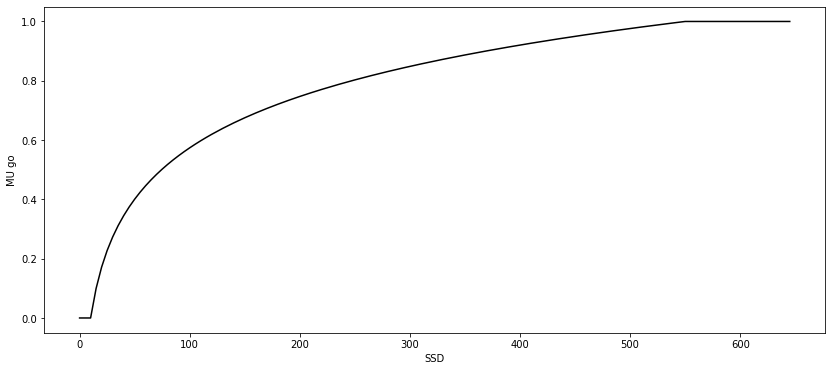

In [29]:
fig,ax = plt.subplots(1,1, figsize=(14, 6))

_ = sns.lineplot(x='SSD', y='MU go', color='k', data=pd.DataFrame(mu_gos, columns=['SSD', 'MU go']))
plt.savefig('figures/graded_mu_go_function.png')